# Individual gene (V and J) usage frequencies for CD4 and CD8 types for each subject.

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
#Define lists for each gene strings.
TRAV=['TRAV1-1*00','TRAV1-2*00','TRAV2*00','TRAV3*00','TRAV4*00','TRAV5*00',
      'TRAV6*00','TRAV7*00','TRAV8-1*00','TRAV9-1*00','TRAV10*00','TRAV11*00',
      'TRAV12-1*00','TRAV8-2*00','TRAV8-3*00','TRAV13-1*00','TRAV12-2*00',
      'TRAV8-4*00','TRAV8-5*00','TRAV13-2*00','TRAV14DV4*00','TRAV9-2*00',
      'TRAV15*00','TRAV12-3*00','TRAV8-6*00','TRAV16*00','TRAV17*00','TRAV18*00',
      'TRAV19*00','TRAV20*00','TRAV21*00','TRAV22*00','TRAV23DV6*00','TRAV24*00',
      'TRAV25*00','TRAV26-1*00','TRAV8-7*00','TRAV27*00','TRAV28*00','TRAV29DV5*00',
      'TRAV30*00','TRAV31*00','TRAV32*00','TRAV33*00','TRAV26-2*00','TRAV34*00',
      'TRAV35*00','TRAV36DV7*00','TRAV37*00','TRAV38-1*00','TRAV38-2DV8*00',
      'TRAV39*00','TRAV40*00','TRAV41*00']

TRBV=['TRBV1*00','TRBV2*00','TRBV3-1*00','TRBV4-1*00','TRBV5-1*00','TRBV6-1*00',
      'TRBV7-1*00','TRBV4-2*00','TRBV6-2*00','TRBV3-2*00','TRBV4-3*00',
      'TRBV6-3*00','TRBV7-2*00','TRBV8-1*00','TRBV5-2*00','TRBV6-4*00',
      'TRBV7-3*00','TRBV8-2*00','TRBV5-3*00','TRBV9*00','TRBV10-1*00',
      'TRBV11-1*00','TRBV12-1*00','TRBV10-2*00','TRBV11-2*00','TRBV12-2*00',
      'TRBV6-5*00','TRBV7-4*00','TRBV5-4*00','TRBV6-6*00','TRBV7-5*00',
      'TRBV5-5*00','TRBV6-7*00','TRBV7-6*00','TRBV5-6*00','TRBV6-8*00',
      'TRBV7-7*00','TRBV5-7*00','TRBV6-9*00','TRBV7-8*00','TRBV5-8*00',
      'TRBV7-9*00','TRBV13*00','TRBV10-3*00','TRBV11-3*00','TRBV12-3*00',
      'TRBV12-4*00','TRBV12-5*00','TRBV14*00','TRBV15*00','TRBV16*00',
      'TRBV17*00','TRBV18*00','TRBV19*00','TRBV20-1*00','TRBV21-1*00',
      'TRBV22-1*00','TRBV23-1*00','TRBV24-1*00','TRBV25-1*00','TRBV26*00',
      'TRBV27*00','TRBV28*00','TRBV29-1*00','TRBV30*00']

TRBJ=['TRBJ1-1*00','TRBJ1-2*00','TRBJ1-3*00','TRBJ1-4*00','TRBJ1-5*00',
    'TRBJ1-6*00','TRBJ2-1*00','TRBJ2-2*00','TRBJ2-3*00','TRBJ2-4*00',
    'TRBJ2-5*00','TRBJ2-6*00','TRBJ2-7*00']

TRAJ=['TRAJ61*00','TRAJ60*00','TRAJ59*00','TRAJ58*00','TRAJ57*00','TRAJ56*00',
      'TRAJ55*00','TRAJ54*00','TRAJ53*00','TRAJ52*00','TRAJ51*00','TRAJ50*00',
      'TRAJ49*00','TRAJ48*00','TRAJ47*00','TRAJ46*00','TRAJ45*00','TRAJ44*00',
      'TRAJ43*00','TRAJ42*00','TRAJ41*00','TRAJ40*00','TRAJ39*00','TRAJ38*00',
      'TRAJ37*00','TRAJ36*00','TRAJ35*00','TRAJ34*00','TRAJ33*00','TRAJ32*00',
      'TRAJ31*00','TRAJ30*00','TRAJ29*00','TRAJ28*00','TRAJ27*00','TRAJ26*00',
      'TRAJ25*00','TRAJ24*00','TRAJ23*00','TRAJ22*00','TRAJ21*00','TRAJ20*00',
      'TRAJ19*00','TRAJ18*00','TRAJ17*00','TRAJ16*00','TRAJ15*00','TRAJ14*00',
      'TRAJ13*00','TRAJ12*00','TRAJ11*00','TRAJ10*00','TRAJ9*00','TRAJ8*00',
      'TRAJ7*00','TRAJ6*00','TRAJ5*00','TRAJ4*00','TRAJ3*00','TRAJ2*00','TRAJ1*00']

In [3]:
def gene_usage(df, gene, gene_list):
    """This function calculates gene usage frequencies for a given gene.
    Inputs:
    df - pandas dataframe of single sequences,
    gene - gene of interest (bestVHit, bestJHit, bestDHit),
    gene_list - gene of interest list (TRAV, TRAJ, TRBV, TRBJ).
    Returns:
    gene_frequency - numpy array of gene of interest frequencies."""
    germline=pd.DataFrame(index=gene_list,columns=['count'])
    for i in gene_list: 
        germline.ix[i]=sum(df[gene]==i)
    gene_frequency=np.divide(np.array(germline['count']).astype(float),len(df))
    return gene_frequency

In [22]:
def bargraph(ar1,ar2,ar3,ar4,ar5, gene_list, xlabel='', ylabel='',fig_title=''):
    """This function takes 5 frequency numpy arrays and plots bargraphs on
    top of each other.
    Inputs:
    ar1,2,3,4,5 - three frequency numpy arrays,
    gene_list - gene of interest list (TRAV, TRAJ, TRBV, TRBJ)
    xlabel='string', ylabel='string', fig_title='string'.
    Returns: saved bargraph figure."""
    f, ax1 = plt.subplots(1, figsize=(10,5))
    bar_width = 1
    bar_l = [i+1 for i in range(len(ar1))]
    tick_pos = [i+(bar_width/2) for i in bar_l]
    ax1.bar(bar_l, ar1, width=bar_width, label='S1', color='red', edgecolor='black')
    ax1.bar(bar_l, ar2, bottom=ar1, width=bar_width, label='S2', color='orange', edgecolor='black')
    ax1.bar(bar_l, ar3, bottom=[i+j for i,j in zip(ar1,ar2)],
            width=bar_width, label='S3', color='black', edgecolor='black')
    ax1.bar(bar_l, ar4, bottom=[i+j+k for i,j,k in zip(ar1,ar2,ar3)], width=bar_width,
            label='S4', color='green', edgecolor='black')
    ax1.bar(bar_l, ar5, bottom=[i+j+k+l for i,j,k,l in zip(ar1,ar2,ar3,ar4)], width=bar_width,
            label='S5', color='blue', edgecolor='black')
    plt.xticks(np.array(tick_pos)-0.5, gene_list, rotation=90, size=8)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    plt.legend(loc=0)
    plt.xlim([min(tick_pos)-bar_width, max(tick_pos)])
    title=fig_title.split('_')
    plt.title(title[0]+' '+title[1])
    plt.tight_layout()

    return plt.savefig(fig_title+'.png')

In [6]:
cd /Users/kgrigait/Desktop/new_data/

/Users/kgrigait/Desktop/new_data


In [7]:
#Load data
TRAcd4_prod_1=pd.read_csv('S1/TRAcd4_productive.txt', sep='\t')
TRAcd8_prod_1=pd.read_csv('S1/TRAcd8_productive.txt', sep='\t')
TRBcd4_prod_1=pd.read_csv('S1/TRBcd4_productive.txt', sep='\t')
TRBcd8_prod_1=pd.read_csv('S1/TRBcd8_productive.txt', sep='\t')

TRAcd4_prod_2=pd.read_csv('S2/TRAcd4_productive.txt', sep='\t')
TRAcd8_prod_2=pd.read_csv('S2/TRAcd8_productive.txt', sep='\t')
TRBcd4_prod_2=pd.read_csv('S2/TRBcd4_productive.txt', sep='\t')
TRBcd8_prod_2=pd.read_csv('S2/TRBcd8_productive.txt', sep='\t')

TRAcd4_prod_3=pd.read_csv('S3/TRAcd4_productive.txt', sep='\t')
TRAcd8_prod_3=pd.read_csv('S3/TRAcd8_productive.txt', sep='\t')
TRBcd4_prod_3=pd.read_csv('S3/TRBcd4_productive.txt', sep='\t')
TRBcd8_prod_3=pd.read_csv('S3/TRBcd8_productive.txt', sep='\t')

TRAcd4_prod_4=pd.read_csv('S4/TRAcd4_productive.txt', sep='\t')
TRAcd8_prod_4=pd.read_csv('S4/TRAcd8_productive.txt', sep='\t')
TRBcd4_prod_4=pd.read_csv('S4/TRBcd4_productive.txt', sep='\t')
TRBcd8_prod_4=pd.read_csv('S4/TRBcd8_productive.txt', sep='\t')

TRAcd4_prod_5=pd.read_csv('S5/TRAcd4_productive.txt', sep='\t')
TRAcd8_prod_5=pd.read_csv('S5/TRAcd8_productive.txt', sep='\t')
TRBcd4_prod_5=pd.read_csv('S5/TRBcd4_productive.txt', sep='\t')
TRBcd8_prod_5=pd.read_csv('S5/TRBcd8_productive.txt', sep='\t')

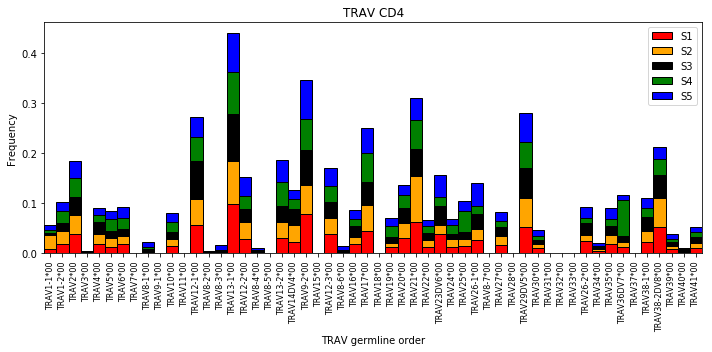

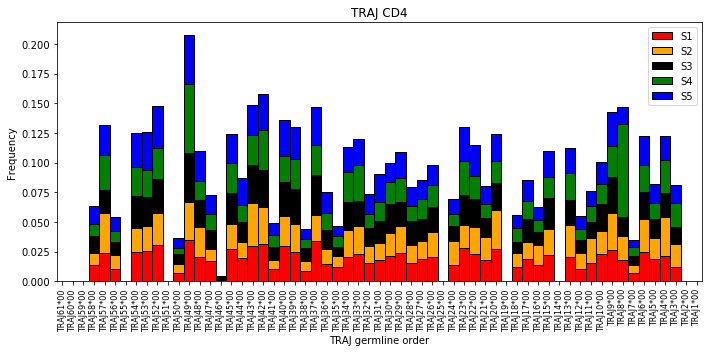

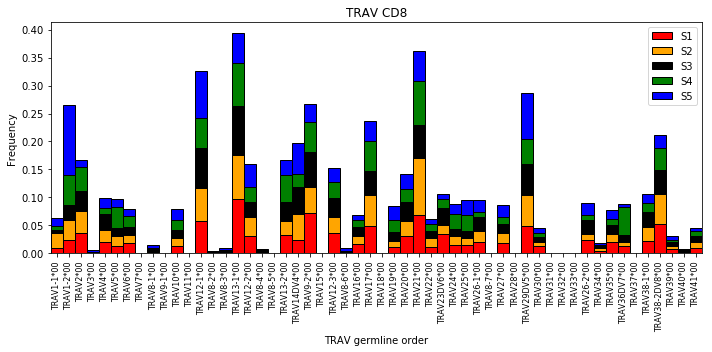

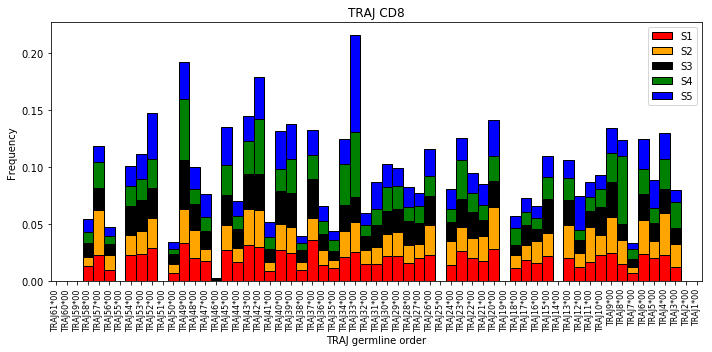

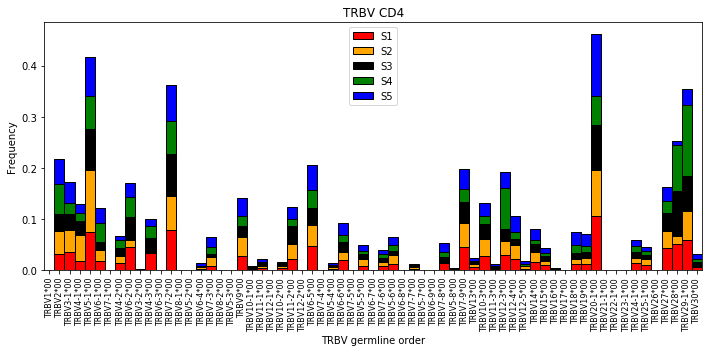

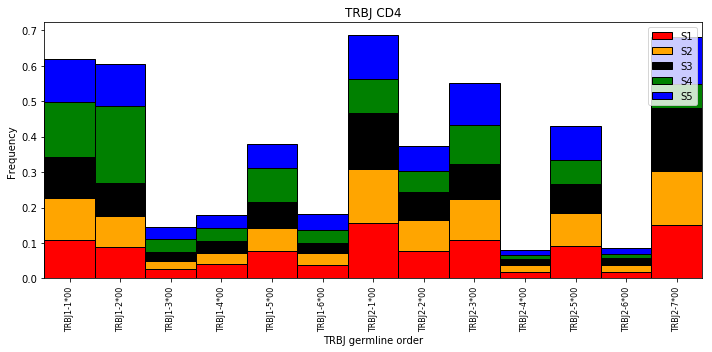

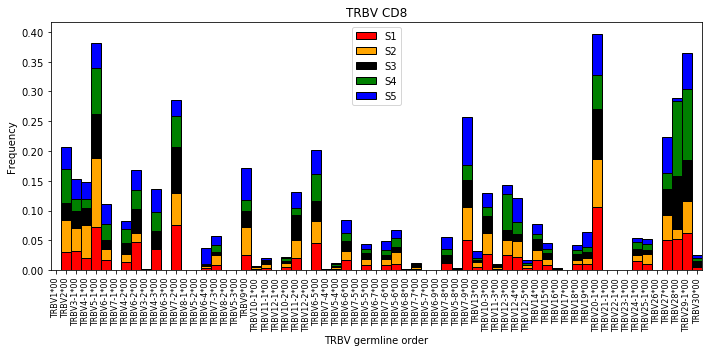

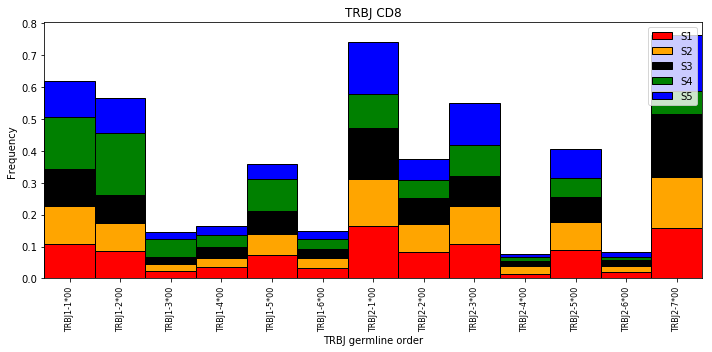

In [23]:
#Alpha V CD4
gf1 = gene_usage(TRAcd4_prod_1, 'bestVHit', TRAV)
gf2 = gene_usage(TRAcd4_prod_2, 'bestVHit', TRAV)
gf3 = gene_usage(TRAcd4_prod_3, 'bestVHit', TRAV)
gf4 = gene_usage(TRAcd4_prod_4, 'bestVHit', TRAV)
gf5 = gene_usage(TRAcd4_prod_5, 'bestVHit', TRAV)
bargraph(gf1,gf2,gf3,gf4,gf5,TRAV, xlabel='TRAV germline order', ylabel='Frequency', fig_title='TRAV_CD4')

#Alpha J CD4
gf1 = gene_usage(TRAcd4_prod_1, 'bestJHit', TRAJ)
gf2 = gene_usage(TRAcd4_prod_2, 'bestJHit', TRAJ)
gf3 = gene_usage(TRAcd4_prod_3, 'bestJHit', TRAJ)
gf4 = gene_usage(TRAcd4_prod_4, 'bestJHit', TRAJ)
gf5 = gene_usage(TRAcd4_prod_5, 'bestJHit', TRAJ)
bargraph(gf1,gf2,gf3,gf4,gf5,TRAJ, xlabel='TRAJ germline order', ylabel='Frequency', fig_title='TRAJ_CD4')

#Alpha V CD8
gf1 = gene_usage(TRAcd8_prod_1, 'bestVHit', TRAV)
gf2 = gene_usage(TRAcd8_prod_2, 'bestVHit', TRAV)
gf3 = gene_usage(TRAcd8_prod_3, 'bestVHit', TRAV)
gf4 = gene_usage(TRAcd8_prod_4, 'bestVHit', TRAV)
gf5 = gene_usage(TRAcd8_prod_5, 'bestVHit', TRAV)
bargraph(gf1,gf2,gf3,gf4,gf5,TRAV, xlabel='TRAV germline order', ylabel='Frequency', fig_title='TRAV_CD8')

#Alpha J CD8
gf1 = gene_usage(TRAcd8_prod_1, 'bestJHit', TRAJ)
gf2 = gene_usage(TRAcd8_prod_2, 'bestJHit', TRAJ)
gf3 = gene_usage(TRAcd8_prod_3, 'bestJHit', TRAJ)
gf4 = gene_usage(TRAcd8_prod_4, 'bestJHit', TRAJ)
gf5 = gene_usage(TRAcd8_prod_5, 'bestJHit', TRAJ)
bargraph(gf1,gf2,gf3,gf4,gf5,TRAJ, xlabel='TRAJ germline order', ylabel='Frequency', fig_title='TRAJ_CD8')

#Beta V CD4
gf1 = gene_usage(TRBcd4_prod_1, 'bestVHit', TRBV)
gf2 = gene_usage(TRBcd4_prod_2, 'bestVHit', TRBV)
gf3 = gene_usage(TRBcd4_prod_3, 'bestVHit', TRBV)
gf4 = gene_usage(TRBcd4_prod_4, 'bestVHit', TRBV)
gf5 = gene_usage(TRBcd4_prod_5, 'bestVHit', TRBV)
bargraph(gf1,gf2,gf3,gf4,gf5,TRBV, xlabel='TRBV germline order', ylabel='Frequency', fig_title='TRBV_CD4')

#Beta J CD4
gf1 = gene_usage(TRBcd4_prod_1, 'bestJHit', TRBJ)
gf2 = gene_usage(TRBcd4_prod_2, 'bestJHit', TRBJ)
gf3 = gene_usage(TRBcd4_prod_3, 'bestJHit', TRBJ)
gf4 = gene_usage(TRBcd4_prod_4, 'bestJHit', TRBJ)
gf5 = gene_usage(TRBcd4_prod_5, 'bestJHit', TRBJ)
bargraph(gf1,gf2,gf3,gf4,gf5,TRBJ, xlabel='TRBJ germline order', ylabel='Frequency', fig_title='TRBJ_CD4')

#Beta V CD8
gf1 = gene_usage(TRBcd8_prod_1, 'bestVHit', TRBV)
gf2 = gene_usage(TRBcd8_prod_2, 'bestVHit', TRBV)
gf3 = gene_usage(TRBcd8_prod_3, 'bestVHit', TRBV)
gf4 = gene_usage(TRBcd8_prod_4, 'bestVHit', TRBV)
gf5 = gene_usage(TRBcd8_prod_5, 'bestVHit', TRBV)
bargraph(gf1,gf2,gf3,gf4,gf5,TRBV, xlabel='TRBV germline order', ylabel='Frequency', fig_title='TRBV_CD8')

#Beta J CD8
gf1 = gene_usage(TRBcd8_prod_1, 'bestJHit', TRBJ)
gf2 = gene_usage(TRBcd8_prod_2, 'bestJHit', TRBJ)
gf3 = gene_usage(TRBcd8_prod_3, 'bestJHit', TRBJ)
gf4 = gene_usage(TRBcd8_prod_4, 'bestJHit', TRBJ)
gf5 = gene_usage(TRBcd8_prod_5, 'bestJHit', TRBJ)
bargraph(gf1,gf2,gf3,gf4,gf5,TRBJ, xlabel='TRBJ germline order', ylabel='Frequency', fig_title='TRBJ_CD8')